In [17]:
import numpy as np
import itertools as it

from numpy import cos, sin
from scipy.linalg import block_diag
from scipy.optimize import leastsq
from types import SimpleNamespace

import Modules.pauli as pauli
import Modules.Ham_MX2_11_band as H
import Modules.TB_parameters as tb
from Modules.TB_parameters import TB, delta, epsilon

%matplotlib inline
import matplotlib.pyplot as plt

Indexing of tight binding parameters is reduced by 1 here compared to the paper. So $t_{ij}^\alpha$ is stored in TB_par$(\alpha-1, i-1, j-1)$, and indices range from 0 to 10, not 1 to 11.

In [18]:
def color_plot(func, kmax=1.0, N=30, center=(0, 0), circular=True, vmin=0, vmax=None,
              xlabel=r'$k_x a$', ylabel=r'$k_y a$', clabel=r'eV', title=r' '):
    """Plot the output of the function func on a mesh in k-space centered at
    the point 'center', with either a circular or a square mesh. """
    
    def evaluate_on_grid(X, Y, func):
        """ X, Y should be in np.meshgrid form. It's enough for func to work on floats. """
        data = []
        for xx, yy in zip(X, Y):
            data.append([func(i,j) for i, j in zip(xx, yy)])
        data = np.array(data)
        return data
    
    if circular:
        # Generate a circular mesh
        r = np.linspace(0, kmax, N)
        phi = np.linspace(0, 2*np.pi, N)
        r, phi = np.meshgrid(r, phi)
        x, y = r*np.cos(phi) + center[0], r*np.sin(phi) + center[1]
    else: # square mesh
        kxs = np.linspace(-kmax + center[0], kmax + center[0], N)
        kys = np.linspace(-kmax + center[1], kmax + center[1], N)
        x, y = np.meshgrid(kxs, kys)

    fvals = evaluate_on_grid(x, y, func=func)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)
    plt.pcolor(x-center[0], y-center[1], fvals, cmap='inferno', vmin=vmin, vmax=vmax)
    plt.colorbar().set_label(label=clabel, size=20)
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)

In [19]:
# SOI strengths, superconducting pairing
p = SimpleNamespace(mu=0.0, Delta=0.2e-3, lambda_M=0.0836, lambda_X=0.0556, Ex=0.001*0, Ey=0.0006*0)

# Tests without SOI

In [4]:
Kp = (2*tb.b1 - tb.b2)/3.

In [5]:
Kp

array([  4.18879020e+00,   2.96059473e-16])

In [6]:
# Momentum from K to Gamma point
ks_K_gamma = np.linspace(Kp[0], 0, 201)

In [8]:
disp = [H.energies(kx, 0, p, spin=False) for kx in ks_K_gamma]

(-7, 5)

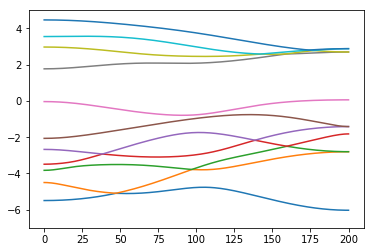

In [9]:
# Dispersion from the K point to the Gamma point (origin)
plt.plot(disp)
plt.ylim(-7, 5)

## Gamma point orbitals

In [11]:
kx, ky = 0, 0
state = 9
for i, (ele1, ele2) in enumerate(zip(H.eigvecs(kx, ky, p, extended_hopping=True, spin=False)[:, state],
                                H.eigvecs(kx, ky, p, extended_hopping=False, spin=False)[:, state])):
    print(i+1, '    ', np.round(ele1, 4), '    ', np.round(ele2, 4))

1      0j      0j
2      0j      0j
3      0j      0j
4      0j      0j
5      0j      0j
6      0j      (-0+0j)
7      (-0.5729+0j)      (0.5784+0j)
8      (-0.1737+0j)      (0.1987+0j)
9      0j      0j
10      (-0.7665+0j)      (0.7482+0j)
11      (-0.2325+0j)      (0.257+0j)


In [12]:
np.round(H.eigvecs(kx, ky, p, extended_hopping=True, spin=False)[:, 9], 4)

array([ 0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,
        0.0000+0.j, -0.5729+0.j, -0.1737+0.j,  0.0000+0.j, -0.7665+0.j,
       -0.2325+0.j])

In [13]:
np.round(H.eigvecs(kx, ky, p, extended_hopping=True, spin=False)[:, 10], 4)

array([ 0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,
        0.0000+0.j, -0.1737+0.j,  0.5729+0.j,  0.0000+0.j, -0.2325+0.j,
        0.7665+0.j])

In [14]:
H.energies(0,0, p, spin=False)

array([-6.03172038, -2.80091996, -2.80091996, -1.8189    , -1.41329516,
       -1.41329516,  0.06182038,  2.70179516,  2.70179516,  2.88591996,
        2.88591996])

## K point orbitals

In [15]:
Kp = (2*tb.b1 - tb.b2)/3.
Kp

array([  4.18879020e+00,   2.96059473e-16])

In [26]:
kx, ky = Kp

In [27]:
H.energies(kx, ky, p, extended_hopping=True, spin=False)

array([-5.49588957, -4.50081174, -3.82867316, -3.49121797, -2.67337875,
       -2.06437667, -0.03470808,  1.77280987,  2.97590107,  3.55461406,
        4.47253092])

In [29]:
state = 10
for i, (ele1, ele2) in enumerate(zip(H.eigvecs(kx, ky, p, extended_hopping=True, spin=False)[:, state],
                                H.eigvecs(kx, ky, p, extended_hopping=False, spin=False)[:, state])):
    print(i+1, '    ', np.round(ele1, 4), '    ', np.round(ele2, 4))

1      (0.6013+0j)      (0.6013+0j)
2      0.6013j      0.6013j
3      (-0-0.5263j)      (-0-0.5263j)
4      -0j      -0j
5      0j      0j
6      0j      0j
7      0j      0j
8      0j      0j
9      0j      0j
10      0j      0j
11      0j      0j


# Check spin splitting of the conduction band at the K point

In [20]:
Kp = (2*tb.b1 - tb.b2)/3.
Kp

array([  4.18879020e+00,   2.96059473e-16])

In [21]:
Es = H.energies(Kp[0], Kp[1], p, extended_hopping=True, spin=True)[14:16]

In [22]:
p.mu

0.0

In [23]:
Es[1] - Es[0]

0.0073610379658777259

In [24]:
H.energies(Kp[0], Kp[1], p, extended_hopping=True, spin=True)

array([-5.4969239 , -5.49670178, -4.5244774 , -4.47699819, -3.86792322,
       -3.79004328, -3.50686112, -3.47787527, -2.69958913, -2.64557875,
       -2.07700764, -2.05430105, -0.10635428,  0.03806205,  1.7674529 ,
        1.77481394,  2.90450655,  3.04456876,  3.54340866,  3.57308608,
        4.44458452,  4.50375156])

In [25]:
H.energies(Kp[0], Kp[1], p, extended_hopping=True, spin=True)[12:16]

array([-0.10635428,  0.03806205,  1.7674529 ,  1.77481394])

In [26]:
def get_splitting(p):
    def func(kx, ky):
        Es = H.energies(kx, ky, p)[14:16]
        return Es[1] - Es[0]
    return func

In [27]:
p.Ex = 0; p.Ey = 0

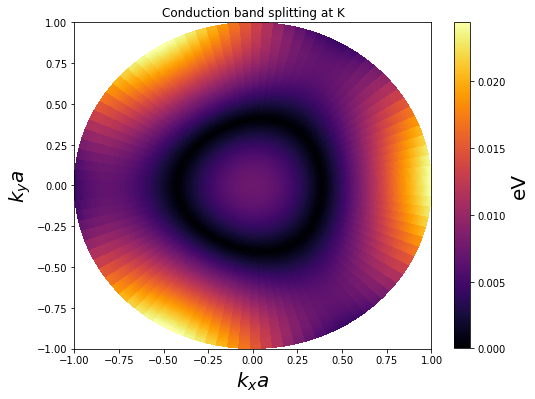

In [28]:
color_plot(get_splitting(p), kmax=1.0, N=100, center=(Kp[0], Kp[1]), circular=True, vmin=0, vmax=None,
              xlabel=r'$k_x a$', ylabel=r'$k_y a$', clabel=r'eV', title=r'Conduction band splitting at K')

In [29]:
color_plot(get_splitting(p), kmax=1.0, N=100, center=(-Kp[0], -Kp[1]), circular=True, vmin=0, vmax=None,
              xlabel=r'$k_x a$', ylabel=r'$k_y a$', clabel=r'eV', title=r'Conduction band splitting at -K')

In [39]:
ks = np.linspace(0.0, 1.0, 201)

In [41]:
theta = np.pi*0.0
disp = [H.energies(k*cos(theta) + Kp[0], k*sin(theta), p) for k in ks]

(1.75, 2.0)

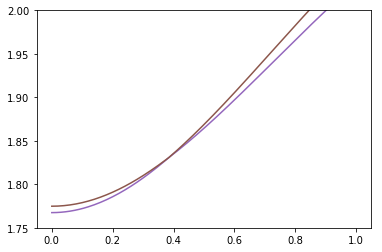

In [42]:
plt.plot(ks,disp)
plt.ylim(1.75, 2.0)

# Fitting the KP Hamiltonian to TB

In [11]:
p.Ex = 0
p.Ey = 0

In [12]:
def KP_dispersion_spin(kx, ky, f0, f1, f2, f3, f4, f5, f6, offs=0, tau=1):
    """Dispersion of the 2 band KP Hamiltonian at K+ or K-
    with spin included. tau = 1 for K+, -1 for K-"""
    tau = 1  # 1 for K+ valley, -1 for K-
    H = (np.kron(0.5*f0*(pauli.s0+pauli.sz) + f1*(tau*kx*pauli.sx + ky*pauli.sy) +
                (kx**2+ky**2)*(f2*pauli.s0+f3*pauli.sz) +
                f4*(kx**2*pauli.sx - ky**2*pauli.sx - 2*tau*kx*ky*pauli.sy),
                pauli.s0) +
         f5*tau*0.5*np.kron(pauli.s0-pauli.sz, pauli.sz) + f6*tau*0.5*np.kron(pauli.s0+pauli.sz, pauli.sz) +
         offs*np.kron(pauli.s0, pauli.s0)
        )
    return np.linalg.eigh(H)[0]

def KP_dispersion_spinless(kx, ky, f0, f1, f2, f3, f4, offs=0, tau=1):
    """Dispersion of the 2 band KP Hamiltonian at K+ or K-
    without spin included. tau = 1 for K+, -1 for K-"""
    tau = 1  # 1 for K+ valley, -1 for K-
    H = (0.5*f0*(pauli.s0+pauli.sz) + f1*(tau*kx*pauli.sx + ky*pauli.sy) +
                (kx**2+ky**2)*(f2*pauli.s0+f3*pauli.sz) +
                f4*(kx**2*pauli.sx - ky**2*pauli.sx - 2*tau*kx*ky*pauli.sy) +
         offs*pauli.s0
        )
    return np.linalg.eigh(H)[0]

In [13]:
f0 = 1.6735
f1 = 1.1518
f2 = 0.0744
f3 = -0.0613
f4 = -0.0780
f5 = 0.0746
f6 = -0.0015

In [46]:
Kp = (2*tb.b1 - tb.b2)/3.
Kp

array([  4.18879020e+00,   2.96059473e-16])

In [47]:
KP_dispersion_spin(0, 0, f0, f1, f2, f3, f4, f5, f6)

array([-0.0746,  0.0746,  1.672 ,  1.675 ])

In [50]:
H.energies(Kp[0], Kp[1], p)[12:16]

array([-0.10635428,  0.03806205,  1.7674529 ,  1.77481394])

In [51]:
KP_dispersion_spinless(0, 0, f0, f1, f2, f3, f4)

array([ 0.    ,  1.6735])

In [52]:
H.energies(Kp[0], Kp[1], p, spin=False)[6:8]

array([-0.03470808,  1.77280987])

In [14]:
def leastsq_func(params, *args):
    """Fit the orbital part of the KP Hamiltonian to the TB model. Spin not included!"""
    # Parameters to fit
    f1 = params[0]
    f2 = params[1]
    f3 = params[2]
    f4 = params[3]
    # Other input
    f0 = args[3]  # Band gap
    offs = args[4]  # Energy shift, to align KP and TB bands.
    ks = args[0]  # List of tuples (kx, ky)
    TB_bands = args[1] # List of 2 entry arrays, TB energies at (kx, ky), spinless
    KP_bands_func = args[2]  # Function to compute the KP band structure
    y = [np.linalg.norm(TB - KP_bands_func(k[0], k[1], f0, f1, f2, f3, f4, offs=offs))
         for TB, k in zip(TB_bands, ks)]
    return np.array(y)  # Minimize the norm of the difference between KP and TB bands

In [54]:
# Fit to TB bands within a radius of kmax centered at K
kmax = 0.13
# Generate a circular mesh
N = 30
r = np.linspace(0, kmax, N)
phi = np.linspace(0, 2*np.pi, N)
r, phi = np.meshgrid(r, phi)
# The mesh is centered at k = 0, since the KP model considers K as the origin.
kx, ky = r*np.cos(phi), r*np.sin(phi)

In [55]:
# Store kx and ky values in a list of tuples
ks = list(zip(kx.flatten(), ky.flatten()))
# Compute the relevant TB bands at each k point - must shift to K+ here!
# We only fit the orbital part, so no SOI.
TB_bands = [H.energies(kx + Kp[0], ky + Kp[1], p, extended_hopping=True, spin=False)[6:8] for (kx, ky) in ks]
# Still keep the k mesh centered at 0 - needed for KP

In [7]:
def manual_fit_parameters(p):
    """To match the KP model to the TB bands, compute the energy shift to align the bands at K
    in the absence of spin, the band gap between conduction and valence bands and the approximate
    spin splitting at K."""
    Kp = (2*tb.b1 - tb.b2)/3.
    # To fit the KP model to the TB model, we first align the energies of the
    # conduction and valence bands at the K point. In the fitting, this is done
    # by shifting the KP dispersion.
    spinless_Es = H.energies(Kp[0], Kp[1], p, spin=False)
    offs = spinless_Es[6]
    # f0 is the energy gap between the conduction and valence band (spinless)
    # at the K point.
    f0 = np.abs(spinless_Es[7] - spinless_Es[6])
    spin_Es = H.energies(Kp[0], Kp[1], p)
    # Spin splitting of the valence band at K. Take the average shift
    # of the two spin bands
    f5 = 0.5*(np.abs(spin_Es[12] - offs) + np.abs(spin_Es[13] - offs))
    # Spin splitting of the conduction band at K. Again, the average
    # shift of the two bands.
    # In MoS2, the splitting of the conduction band has opposite sign to that of the
    # valence band - as in the paper, we thus use a negative splitting for the conduction band.
    f6 = -0.5*(np.abs(spin_Es[14] - spinless_Es[7]) + np.abs(spin_Es[15] - spinless_Es[7]))
    return offs, f0, f5, f6

In [8]:
# Initial fit parameters

# From the paper [eV]
# f0 = 1.6735
# f1 = 1.1518
# f2 = 0.0744
# f3 = -0.0613
# f4 = -0.0780
# f5 = 0.0746
# f6 = -0.0015

# Energy shift, band gap and approximate SOI splittings - only first
# two important for fitting.
# Take other initial values from the paper.
offs, f0, f5, f6 = manual_fit_parameters(p)
f1 = 1.1518
f2 = 0.0744
f3 = -0.0613
f4 = -0.0780

In [58]:
start_params = [f1, f2, f3, f4]
args = (ks, TB_bands, KP_dispersion_spinless, f0, offs)
result = leastsq(leastsq_func, start_params, args=args, maxfev=2500)

In [59]:
result

(array([ 1.08543505, -0.03998396, -0.17304024, -0.05354117]), 1)

In [60]:
ff1, ff2, ff3, ff4 = result[0]

In [61]:
print(f0, ff1, ff2, ff3, ff4, f5, f6)

1.80751795445 1.08543505428 -0.0399839628532 -0.173040236193 -0.0535411650926 0.072208162186 -0.00368051898294


Check the fit without SOI

In [62]:
ks = np.linspace(-1, 1, 201)

In [63]:
theta = np.pi*0.0
TB_disp = [H.energies(k*cos(theta) + Kp[0], k*sin(theta) + Kp[1], p, spin=False) for k in ks]
KP_disp = [KP_dispersion_spinless(k*cos(theta), k*sin(theta), f0, ff1, ff2, ff3, ff4, offs=offs)
           for k in ks]

In [64]:
plt.plot(ks, TB_disp)
plt.plot(ks, KP_disp)
plt.ylim(-0.5, 2.2)
# plt.ylim(1.75, 2.2)

(-0.5, 2.2)

(1.75, 1.9)

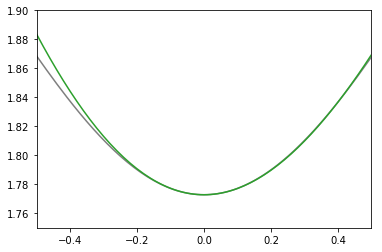

In [65]:
plt.plot(ks, TB_disp)
plt.plot(ks, KP_disp)
plt.xlim(-0.5, 0.5)
plt.ylim(1.75, 1.9)

And with SOI

In [66]:
ks = np.linspace(-1, 1, 201)

In [67]:
theta = np.pi*0.3
TB_disp_SOI = [H.energies(k*cos(theta) + Kp[0], k*sin(theta) + Kp[1], p, spin=True) for k in ks]
KP_disp_SOI = [KP_dispersion_spin(k*cos(theta), k*sin(theta), f0, ff1, ff2, ff3, ff4, f5, f6, offs=offs)
               for k in ks]

In [68]:
plt.plot(ks, TB_disp_SOI)
plt.plot(ks, KP_disp_SOI)
plt.xlim(-0.6, 0.6)
plt.ylim(1.75, 1.9)
# plt.ylim(1.765, 1.785)
# plt.ylim(1.6, 1.8)

(1.75, 1.9)

(1.82, 1.86)

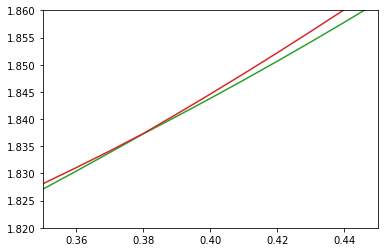

In [69]:
# plt.plot(ks, TB_disp_SOI)
plt.plot(ks, KP_disp_SOI)
# plt.xlim(-0.6, 0.6)
plt.xlim(0.35, 0.45)
# plt.ylim(1.75, 1.9)
plt.ylim(1.82, 1.86)

(1.8, 1.9)

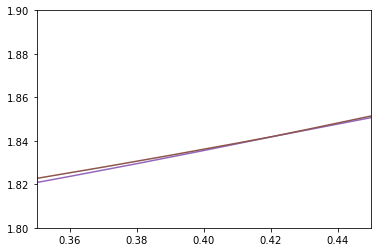

In [70]:
plt.plot(ks, TB_disp_SOI)
# plt.plot(ks, KP_disp_SOI)
# plt.xlim(-0.6, 0.6)
# plt.ylim(1.75, 1.9)
plt.xlim(0.35, 0.45)
# plt.ylim(1.75, 1.9)
plt.ylim(1.80, 1.9)

## Conduction band splitting in the KP model

In [15]:
def KP_splitting(p, fitted=True):
    def func(kx, ky):
        if fitted:
            f1, f2, f3, f4 = 1.08543505, -0.03998396, -0.17304024, -0.05354117
            offs, f0, f5, f6 = manual_fit_parameters(p)
            Es = KP_dispersion_spin(kx, ky, f0, f1, f2, f3, f4, f5, f6, offs=offs)[2:4]
        else:
            f0 = 1.6735
            f1 = 1.1518
            f2 = 0.0744
            f3 = -0.0613
            f4 = -0.0780
            f5 = 0.0746
            f6 = -0.0015
            Es = KP_dispersion_spin(kx, ky, f0, f1, f2, f3, f4, f5, f6, offs=0)[2:4]
        return Es[1] - Es[0]
    return func

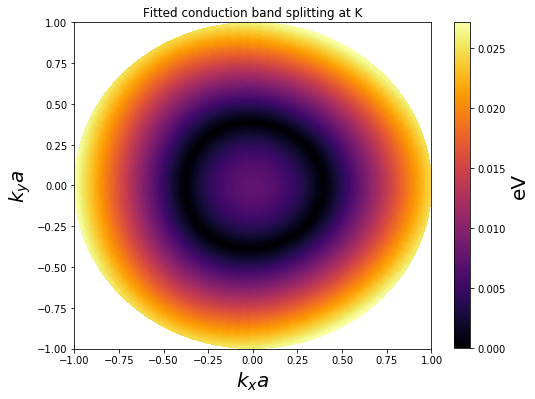

In [16]:
color_plot(KP_splitting(p, fitted=True), kmax=1.0, N=100, center=(0, 0), circular=True, vmin=0, vmax=None,
           xlabel=r'$k_x a$', ylabel=r'$k_y a$', clabel=r'eV', title=r'Fitted conduction band splitting at K')

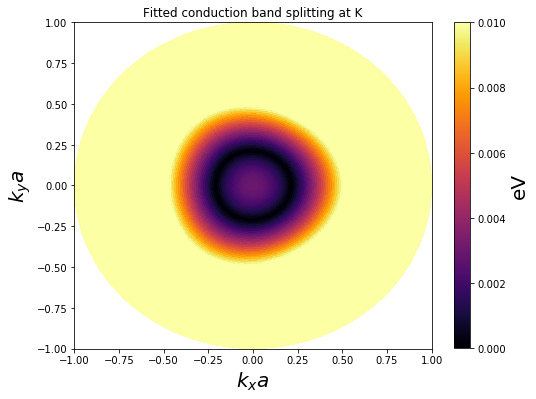

In [73]:
color_plot(KP_splitting(p, fitted=False), kmax=1.0, N=100, center=(0, 0), circular=True, vmin=0, vmax=1e-2,
           xlabel=r'$k_x a$', ylabel=r'$k_y a$', clabel=r'eV', title=r'Fitted conduction band splitting at K')

## Check if the Hamiltonian is even in $k_y$

In [74]:
def check_even(p, flip_kx=True, flip_ky=True, spin=True, SC=False):
    def func(kx, ky):
        if flip_kx:
            skx = -1
        else:
            skx = 1
        if flip_ky:
            sky = -1
        else:
            sky = 1
        E1 = H.energies(kx, ky, p, spin=spin, SC=SC)
        E2 = H.energies(skx*kx, sky*ky, p, spin=spin, SC=SC)
        return np.linalg.norm(E1 - E2)
    return func

In [75]:
p

namespace(Delta=0.0002, Ex=0, Ey=0, lambda_M=0.0836, lambda_X=0.0556, mu=0.0)

In [80]:
kmax = 2.0
N = 50
p.Ex = 0.003
p.Ey = 0.001

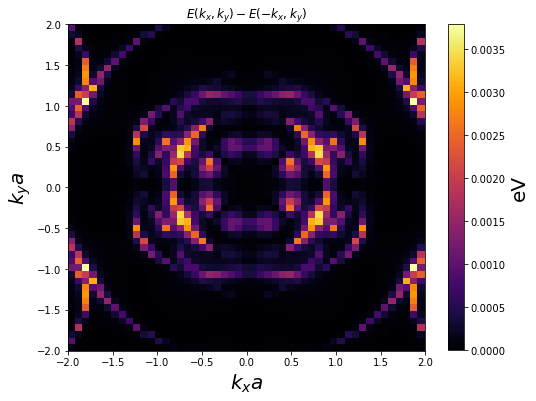

In [81]:
color_plot(check_even(p, flip_ky=False, SC=True), kmax=kmax, N=N, circular=False, vmin=0, vmax=None,
           xlabel=r'$k_x a$', ylabel=r'$k_y a$', clabel=r'eV', title=r'$E(k_x, k_y) - E(-k_x, k_y)$')

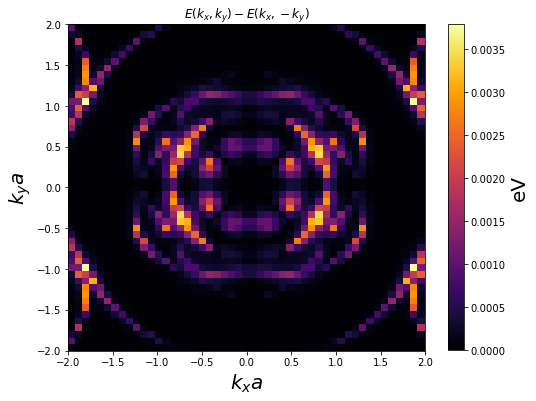

In [82]:
color_plot(check_even(p, flip_kx=False, SC=True), kmax=kmax, N=N, circular=False, vmin=0, vmax=None,
           xlabel=r'$k_x a$', ylabel=r'$k_y a$', clabel=r'eV', title=r'$E(k_x, k_y) - E(k_x, -k_y)$')

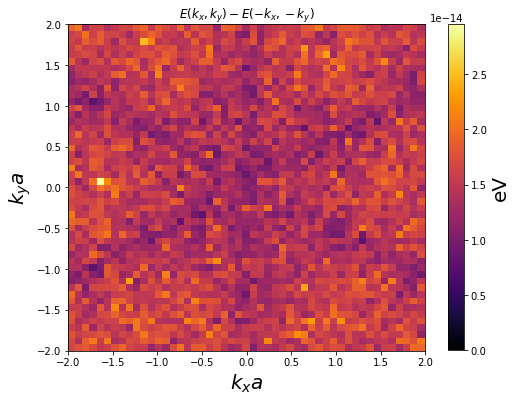

In [83]:
color_plot(check_even(p, SC=True), kmax=kmax, N=N, circular=False, vmin=0, vmax=None,
           xlabel=r'$k_x a$', ylabel=r'$k_y a$', clabel=r'eV', title=r'$E(k_x, k_y) - E(-k_x, -k_y)$')

## Effective 3-band SOI Hamiltonian

In [84]:
SOI = H.SOI_Ham(lambda_M = 0.0836, lambda_X = 0.0556)

In [85]:
# Conduction band energy at K without SOI
Ec0 = H.energies(Kp[0], Kp[1], p, extended_hopping=True, spin=False)[7]

In [86]:
Ec0

1.772809874659262

In [87]:
shift_SOI = SOI - np.eye(SOI.shape[0])*Ec0

Unitary that reorders the basis, such that the M d-orbitals form the first block (6 by 6). First three are spin up, last 3 spin down. Convention for U is $U^\dagger H U U^\dagger \psi$

In [88]:
U = np.eye(22)
inds = [(1, 6), (2, 7), (16, 3), (17, 4)]

for i, j in inds:
    U[j, i] = 1
    U[i, j] = 1
    U[i, i] = 0
    U[j, j] = 0
    
# Send 0 to 18
U[0, 18] = 1
U[18, 18] = 0
# Send 18 to 5
U[18, 5] = 1
U[5, 5] = 0
# Send 5 to 0
U[5, 0] = 1
U[0, 0] = 0

In [89]:
np.allclose(U.dot(U.T.conj()), np.eye(U.shape[0]))

True

In [90]:
psi = np.array(range(22))

In [91]:
U.T.conj().dot(psi)

array([  5.,   6.,   7.,  16.,  17.,  18.,   1.,   2.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,   3.,   4.,   0.,  19.,  20.,  21.])

In [92]:
# Transform the SOI Hamiltonian to the new basis
new_SOI = U.T.conj().dot(shift_SOI).dot(U)

In [93]:
new_SOI

array([[-1.77280987+0.j        ,  0.00000000+0.j        ,
         0.00000000+0.j        ,  0.00000000+0.j        ,
         0.00000000+0.j        ,  0.00000000+0.j        ,
         0.00000000+0.j        ,  0.00000000+0.j        ,
         0.00000000+0.j        ,  0.00000000+0.j        ,
         0.00000000+0.j        , -0.07239972+0.j        ,
         0.00000000+0.07239972j,  0.00000000+0.j        ,
         0.00000000+0.j        ,  0.00000000+0.j        ,
         0.00000000+0.j        ,  0.00000000+0.j        ,
         0.00000000+0.j        ,  0.00000000+0.j        ,
         0.00000000+0.j        ,  0.00000000+0.j        ],
       [ 0.00000000+0.j        , -1.77280987+0.j        ,
         0.00000000+0.0836j    ,  0.00000000+0.j        ,
         0.00000000+0.j        ,  0.00000000+0.j        ,
         0.00000000+0.j        ,  0.00000000+0.j        ,
         0.00000000+0.j        ,  0.00000000+0.j        ,
         0.00000000+0.j        ,  0.00000000-0.0418j    ,
         0.04

If in the new basis the SOI Hamiltonian is
$$ H_{\mathrm{SOI}} \equiv H_{\mathrm{SOI}} - E_c^0 =
\begin{bmatrix}
h_d & \chi \\
\chi^\dagger & h_{\theta}
\end{bmatrix} $$
where $E_c^0$ is the energy of the spinless conduction band at $K$ and $h_d$ acts on the 6x6 block of M d-orbitals, then for small $E$, i.e. small energies from the conduction band minimum, one can show that
$$
\left[1 + \chi (h_\theta^{-1})^2 \chi^\dagger \right]^{-1} \left[h_d - \chi h_\theta^{-1}\chi^\dagger \right] \boldsymbol{d} = E \boldsymbol{d},
$$
where $\boldsymbol{d}$ is the vector of tight binding amplitudes of the d-orbitals.

In [94]:
hd = new_SOI[:6, :6]
chi = new_SOI[:6, 6:]
ht = new_SOI[6: ,6:]

In [95]:
htinv = np.linalg.inv(ht)

H_eff_SOI = np.linalg.inv(np.eye(6) + chi.dot(htinv).dot(htinv).dot(chi.T.conj())).dot(
    hd - chi.dot(htinv).dot(chi.T.conj()))

In [96]:
np.allclose(H_eff_SOI - H_eff_SOI.T.conj(), 0)

True

In [97]:
H_eff_SOI[:3, :3]

array([[ -1.76142472e+00 +0.00000000e+00j,
          0.00000000e+00 -1.01507776e-18j,
         -1.01507776e-18 +0.00000000e+00j],
       [  0.00000000e+00 +1.19479028e-18j,
         -1.76863586e+00 +0.00000000e+00j,
          0.00000000e+00 +7.94259863e-02j],
       [ -1.19479028e-18 +0.00000000e+00j,
          0.00000000e+00 -7.94259863e-02j,
         -1.76863586e+00 +0.00000000e+00j]])

In [98]:
np.round(H_eff_SOI, 1)

array([[-1.8+0.j ,  0.0-0.j , -0.0+0.j ,  0.0+0.j ,  0.0+0.j ,  0.0+0.j ],
       [ 0.0+0.j , -1.8+0.j ,  0.0+0.1j,  0.0+0.j ,  0.0+0.j ,  0.0+0.j ],
       [-0.0+0.j ,  0.0-0.1j, -1.8+0.j ,  0.0+0.j ,  0.0+0.j ,  0.0+0.j ],
       [ 0.0+0.j ,  0.0+0.j ,  0.0+0.j , -1.8+0.j ,  0.0-0.j ,  0.0+0.j ],
       [ 0.0+0.j ,  0.0+0.j ,  0.0+0.j ,  0.0+0.j , -1.8+0.j ,  0.0-0.1j],
       [ 0.0+0.j ,  0.0+0.j ,  0.0+0.j ,  0.0+0.j ,  0.0+0.1j, -1.8+0.j ]])

In [99]:
H_eff_SOI

array([[ -1.76142472e+00 +0.00000000e+00j,
          0.00000000e+00 -1.01507776e-18j,
         -1.01507776e-18 +0.00000000e+00j,
          0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 +0.00000000e+00j],
       [  0.00000000e+00 +1.19479028e-18j,
         -1.76863586e+00 +0.00000000e+00j,
          0.00000000e+00 +7.94259863e-02j,
          0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 +0.00000000e+00j],
       [ -1.19479028e-18 +0.00000000e+00j,
          0.00000000e+00 -7.94259863e-02j,
         -1.76863586e+00 +0.00000000e+00j,
          0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 +0.00000000e+00j],
       [  0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 +0.00000000e+00j,
         -1.76142472e+00 +0.00000000e+00j,
          0.00000000e+00 -1.01507776e-18j,
        